In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# without Foil

In [ ]:
deadcols = ['KE', 'cosTh']

In [ ]:
dead_events = pd.read_csv('./energy-costh-deadevents-apr09/dead_events.txt', sep = " ",names = deadcols, header = None )

In [ ]:
cols_dead_thrs = ['KE', 'dESci1', 'dESci2', 'cosTh']

In [ ]:
dead_events_bcz_of_threshold = pd.read_csv('../apr/energy-costh-deadevents-apr09/dead_events_belowThreshold.txt',sep = " ", names = cols_dead_thrs, header = None)

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title(r'$<cos\theta>$ distribution for dead events ', fontsize = 16)
plt.savefig('../apr/cos_th_dead_events.png')


In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events['KE'], bins = 80, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title('Initial KE distribution for dead events ', fontsize = 16)

plt.savefig('../apr/ke_dead_events.png')



In [ ]:
dead_events_bcz_of_threshold.info()

In [ ]:
dead_events_bcz_of_threshold.describe()

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_bcz_of_threshold['KE'], bins = 80, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title('Initial KE distribution for dead events ', fontsize = 16)

plt.savefig('../apr/ke_dead_events_duetothr.png')



In [ ]:
#sns.histplot(dead_events_bcz_of_threshold['cosTh'],bins = 20 , log_scale = (False, True))
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_bcz_of_threshold['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False,label = 'dead events')# log_scale=(False, True), )

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
plt.ylim(0, 20000)
plt.title(r'$<cos\theta>$ distribution for dead events due to detector threshold ', fontsize = 16)
plt.savefig('../apr/cos_th_dead_events_duetothr.png')


In [ ]:
sns.histplot(dead_events_bcz_of_threshold['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False)#, log_scale=(False, True), label = 'dead events')


In [2]:
cols = ['eRconstTot', 'cosTh', 'E1']
type0 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type0_energycosth.txt', sep = " ",header = None, names = cols,dtype=np.float16)#.drop(['E1'], axis = 1)

In [3]:
type0.head()

,eRconstTot,cosTh,E1
0,214.25,-0.451416,0.0
1,223.50,-0.594727,0.0
2,470.00,0.368164,470.0
3,221.00,-0.382568,0.0
4,157.50,0.191162,157.5


In [4]:
def beta (df): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    
  df['beta'] = np.sqrt((df['eRconstTot']*df['eRconstTot']) + (2*m_e*df['eRconstTot'])) / (m_e + df['eRconstTot'])
     return df

In [7]:
def betaval (KE): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta


In [11]:
m_e = 511
type0['beta'] = np.sqrt((type0['eRconstTot']*type0['eRconstTot']) + (2*m_e*type0['eRconstTot'])) / (m_e + type0['eRconstTot'])
  

In [3]:
m_e = 511
total_energy = type0['eRconstTot'] + m_e

# Calculate beta
type0['beta'] = np.sqrt(total_energy**2 - m_e**2) / total_energy

In [4]:
type0['betacosth'] = type0['beta']*type0['cosTh']

In [8]:
betaval(470)

0.8536195110974358

In [5]:
type0 = beta(type0)

In [9]:
type0['beta'].isna().sum()

0

In [5]:
type0

,eRconstTot,cosTh,E1,beta,betacosth
0,214.250,-0.451416,0.000,0.709620,-0.320334
1,223.500,-0.594727,0.000,0.718321,-0.427205
2,470.000,0.368164,470.000,0.853620,0.314272
3,221.000,-0.382568,0.000,0.716013,-0.273924
4,157.500,0.191162,157.500,0.644745,0.123251
...,...,...,...,...,...
78063068,513.000,0.237305,513.000,0.866588,0.205646
78063069,201.125,-0.131470,0.000,0.696486,-0.091567
78063070,175.375,-0.351318,0.000,0.667632,-0.234552
78063071,38.125,0.528320,38.125,0.366110,0.193424


In [ ]:
del type02

In [35]:
misbackscattered_only .head()

,eRconstTot,cosTh,E1,Det
24,203.250000,0.040863,0.000,2
54,191.375000,-0.019409,191.375,1
76,167.625000,-0.035675,167.625,1
100,374.750000,0.035645,0.000,2
177,25.015625,0.277344,0.000,2


In [32]:


misbackscattered_only['Det'] = np.where(misbackscattered_only['E1'] != 0, 1, 2)


/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
type01 = type0[type0['E1'] != 0].copy().drop('E1', axis = 1)


In [11]:
type02 = type0[type0['E1'] == 0.0].copy().drop('E1', axis = 1)


In [89]:
#calculating the mean of the binned value
def avgXvsY (df, xAxis, yAxis, nbins, minRange,maxRange) :
    mean_stat = scipy.stats.binned_statistic(x = df[xAxis], values = df[yAxis], statistic='mean', bins = nbins, range = (minRange,maxRange))
    meanY = mean_stat.statistic
    xEdge = mean_stat.bin_edges[1:]
    return xEdge,meanY
    
    

In [12]:
avgCosMS, eReconstMS = avgEvsCosth(misbackscattered_only, 'cosTh')

/home/rhythm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


Text(0.5, 1.0, ' $\\cos(\\theta) $distribution for mis-scattered type 0 events  ')

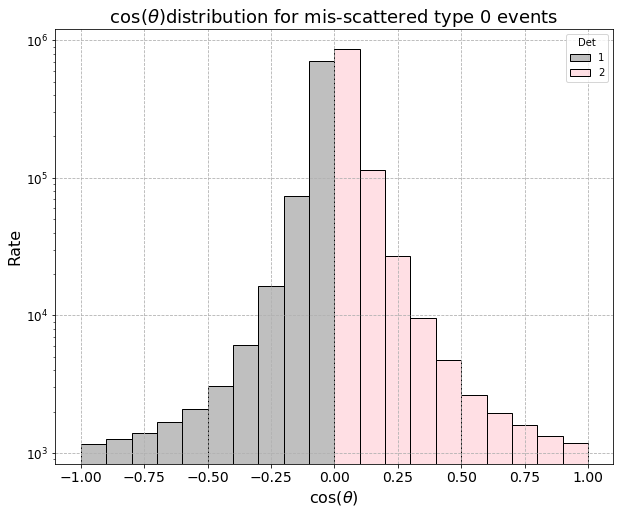

In [46]:
# Define your custom colors
hue_colors = {1: 'gray', 2: 'pink'}
hue_labels = {1: 'deposits energy in Det 1', 2: 'deposits energy in Det 2'}

plt.figure(figsize = (10, 8))

sns.histplot(misbackscattered_only, x='cosTh', color=hue_colors, log_scale=(False, True), bins=20, hue='Det',palette=hue_colors, hue_order=hue_labels,legend=True)
#plt.ylim(-0.01,0.05)
#plt.xlim(0, 800)
plt.xticks(fontsize =14)
plt.yticks(fontsize =12)
plt.xlabel(r'$\cos(\theta)$', fontsize = 16)
plt.ylabel('Rate',fontsize = 16)
#plt.legend()
plt.grid(which = 'major', axis = 'both',linestyle = '--')
plt.title(r' $\cos(\theta) $distribution for mis-scattered type 0 events  ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

Text(0.5, 1.0, ' Reconstructed energy distribution for mis-scattered type 0 events  ')

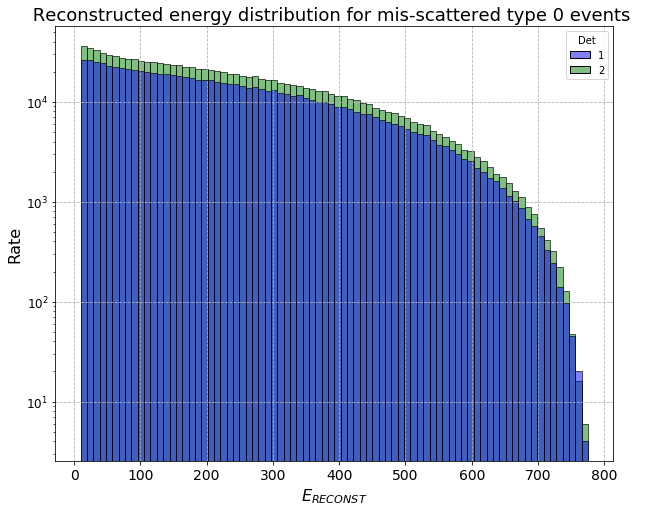

In [51]:
# Define your custom colors
hue_colors = {1: 'blue', 2: 'green'}
hue_labels = {1: 'deposits energy in Det 1', 2: 'deposits energy in Det 2'}

plt.figure(figsize = (10, 8))

sns.histplot(misbackscattered_only, x='eRconstTot', color='blue', log_scale=(False, True), bins=80, hue='Det',palette=hue_colors, hue_order=hue_labels,legend=True)
#plt.ylim(-0.01,0.05)
#plt.xlim(0, 800)
plt.xticks(fontsize =14)
plt.yticks(fontsize =12)
plt.xlabel(R'$E_{RECONST}$', fontsize = 16)
plt.ylabel('Rate',fontsize = 16)
#plt.legend()
plt.grid(which = 'major', axis = 'both',linestyle = '--')
plt.title(r' Reconstructed energy distribution for mis-scattered type 0 events  ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

Text(0.5, 1.0, ' $\\cos(\\theta) $distribution for mis-scattered type 0 events  ')

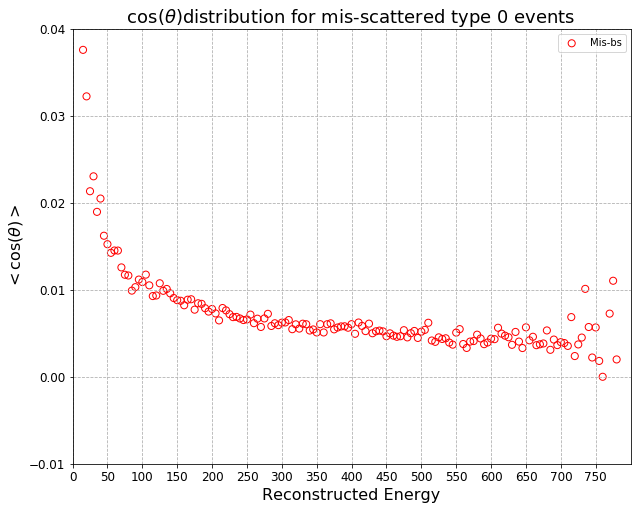

In [52]:

plt.figure(figsize = (10, 8))
plt.scatter(x = eReconstMS, y = avgCosMS,  s = 50, facecolors='none', edgecolors='red', label = 'Mis-bs')
plt.ylim(-0.01,0.04)
plt.xlim(0, 800)
plt.xticks(np.arange(0,800,50),fontsize =12)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.grid(which = 'both', axis = 'both',linestyle = '--')
plt.title(r' $\cos(\theta) $distribution for mis-scattered type 0 events  ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

In [12]:
avgBetaCosth1, Erconst1 = avgEvsCosth(type01, 'betacosth')
avgBetaCosth2, Erconst2 = avgEvsCosth(type02, 'betacosth')

/home/rhythm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


In [7]:
avgBetaCosth, Erconst = avgEvsCosth(type0, 'betacosth')

/home/rhythm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


Text(0.5, 1.0, 'Energy deposited in det1 Type 0 ONLY $\\cos(\\theta)$ ')

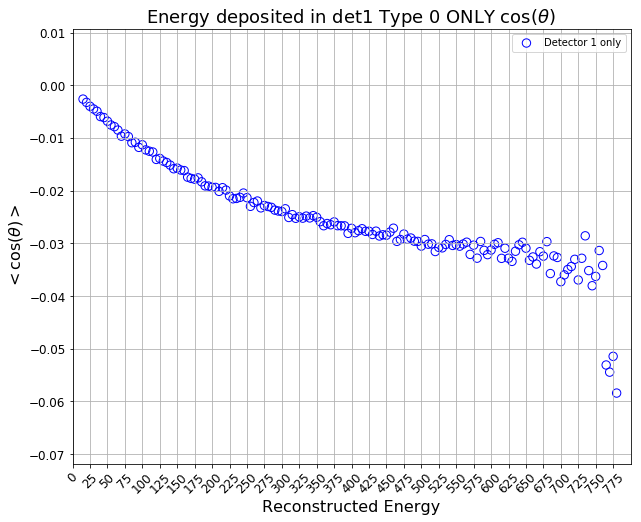

In [9]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst, y = avgBetaCosth,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

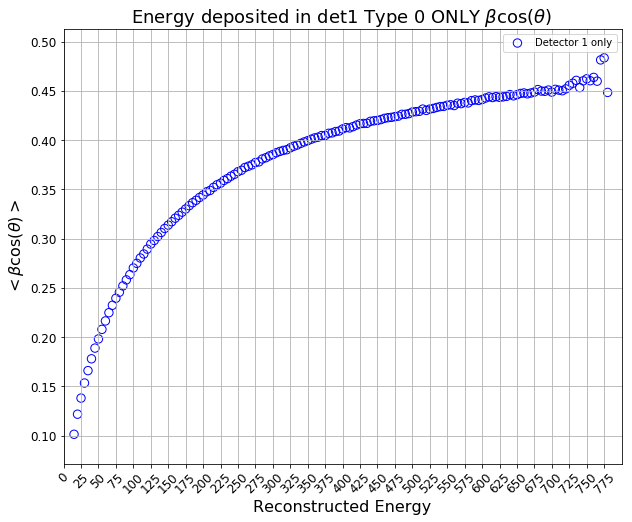

In [14]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst1, y = avgBetaCosth1,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\beta\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\beta\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_btacos_th_distribution_type0_det1.png')
  

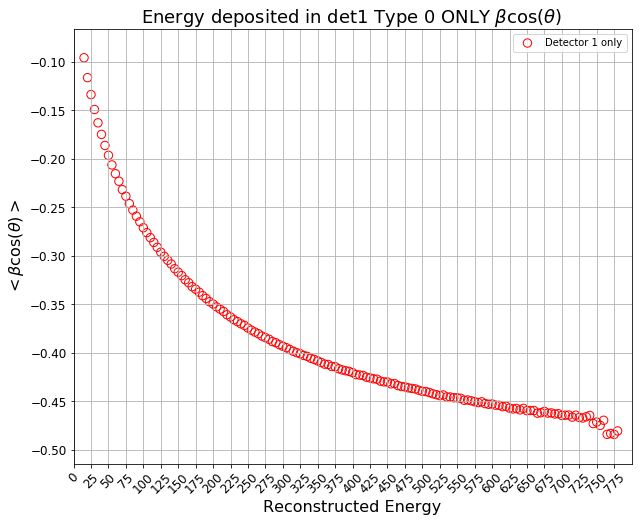

In [16]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst2, y = avgBetaCosth2,  s = 70, facecolors='none', edgecolors='red', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\beta\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\beta\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_btacos_th_distribution_type0_det2.png')
  

In [ ]:
avgCosTh, Etot = avgEvsCosth(type0)

In [ ]:
avgCosTh1 , E1 =avgEvsCosth(type01)
avgCosTh2 , E2 =avgEvsCosth(type02)

In [ ]:
del type0

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E1, y = avgCosTh1,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

for smaller energy dposited in the detector 1 only for type 0. the avg costheta increases as a function of 

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'Detector 2 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(-0.55,-0.4)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det2 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0_det2.png')


In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Etot, y = avgCosTh,  s = 70, facecolors='none', edgecolors='green', label = 'avgcosTh')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,20),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(-0.05,0.01)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Reconstructed for Type 0 ONLY $<\cos(\theta)>$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0.png')
  
  

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E1, y = avgCosTh1,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')
plt.scatter(x = Etot, y = avgCosTh,  s = 70, facecolors='none', edgecolors='blue', label = 'avgcosTh')

plt.xlim(0, 120)
plt.xticks(np.arange(0,120,10),fontsize =12)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(-0.05,0.01)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
  

In [ ]:
type0['poscoth'] =np.abs (type0['cosTh'])

In [ ]:
type0

In [ ]:
costhp,avgE  = avgEvsCosth(type0, 'poscoth')

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x = avgE, y = costhp,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
#plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<|\cos(\theta)|>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both', linestyle = '--')
plt.title(r'Reconstructed for Type 0 ONLY $<|\cos(\theta)|>$ ', fontsize = 18)
  
plt.savefig('../apr/abs_avg_cos_th_distribution_type0.png')

In [ ]:

# Convert cos(theta) to theta in degrees
type0['theta'] = np.degrees(np.arccos(type0['cosTh']))


In [ ]:
avg_theta,avg_E  = avgEvsCosth(type0, 'theta')

In [ ]:
avg_E

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x = avgE, y = avg_theta,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
#plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\theta>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both', linestyle = '--')
plt.title(r'Reconstructed for Type 0 ONLY $<\theta>$ ', fontsize = 18)
  

In [ ]:
type0.head()

In [ ]:
type0 = type0.drop(['poscoth', 'theta'], axis = 1)
lowType0 = type0[type0['eRconstTot'] < 150].copy()

In [ ]:
lowType0

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(lowType0['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False)
plt.ylim(0,900000 )

In [ ]:
lowType01 = type01[type01['eRconstTot'] < 150].copy()
lowType02 = type02[type02['eRconstTot'] < 150].copy()

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(lowType01['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'Detector 1')

sns.histplot(lowType02['cosTh'], bins = 20, element = 'step', color = 'red', fill = False, log_scale=(False, True), label = 'Detector 2')
plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
plt.ylim(0, 1e7)
plt.title(r'$<cos\theta>$ distribution for E < 150 keV', fontsize = 16)

# with foil 

In [2]:
type01_cols = ['KE', 'pZe', 'E1', 'dEeSilicon2', 'eFoil1', 'eFoil2'] 
  
type02_cols =['KE', 'pZe', 'E2', 'dEeSilicon1', 'eFoil1', 'eFoil2'] 
  

In [3]:
type01 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type01_energycosth_foil.txt', sep = " ",header = None, names = type01_cols,dtype=np.float16)#.drop(['E1'], axis = 1)

In [4]:
type02 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type02_energycosth_foil.txt', sep = " ",header = None, names = type02_cols,dtype=np.float16)#.drop(['E1'], axis = 1)

In [6]:
type02

,KE,pZe,E2,dEeSilicon1,eFoil1,eFoil2
0,592.50,-0.830566,590.50,0.0,0.0,0.000000
1,335.00,-0.982910,333.75,0.0,0.0,0.000000
2,270.00,-0.555664,266.75,0.0,0.0,0.000000
3,337.75,-0.888184,336.00,0.0,0.0,0.000000
4,414.25,-0.385498,413.00,0.0,0.0,0.023849


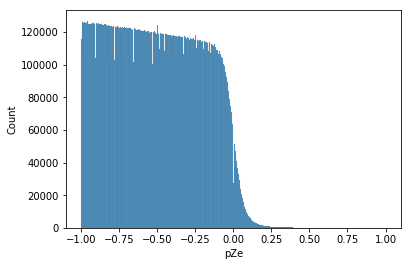

In [15]:
sns.histplot(type02['pZe'])

In [18]:
misscatter_02_foil1_dep = type02[type02['eFoil1'] != 0]

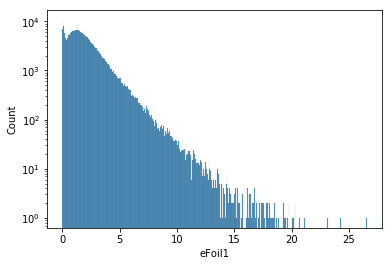

In [21]:
sns.histplot(misscatter_02_foil1_dep['eFoil1'], log_scale=(False, True))

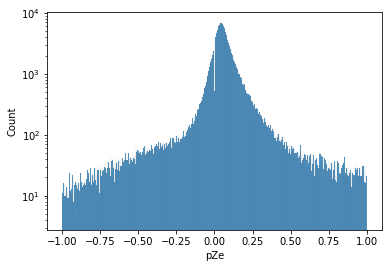

In [22]:
sns.histplot(misscatter_02_foil1_dep['pZe'], log_scale=(False, True))

In [85]:
deposits_energy_foil1_emitted_negZ = misscatter_02_foil1_dep[misscatter_02_foil1_dep['pZe']< 0]
#sns.histplot( misscatter_02_foil1_dep['E2'], hue=misscatter_02_foil1_dep['pZe'])#deposit energy in foil1 and come back deposit in det 2

In [86]:
deposits_energy_foil1_emitted_negZ

,KE,pZe,E2,dEeSilicon1,eFoil1,eFoil2
555,518.000000,-0.002718,510.250000,0.000000,1.866211,0.840332
1176,54.937500,-0.171997,45.687500,0.000000,2.320312,0.520996
1383,78.562500,-0.015282,73.937500,0.000000,1.867188,0.353516
1481,171.125000,-0.046600,157.375000,0.000000,3.468750,1.044922
1491,30.828125,-0.171509,11.351562,0.000000,0.424316,2.115234
...,...,...,...,...,...,...
40978617,221.625000,-0.503906,207.375000,0.000000,2.859375,1.067383
40979023,127.625000,-0.083862,117.937500,0.000000,4.402344,3.201172
40979190,212.250000,-0.069458,204.500000,0.000000,2.429688,1.062500
40979515,187.875000,-0.044281,173.000000,0.000000,6.707031,1.553711


In [24]:
# type 02
# events that are emitted in opposite direction!
miscatter_type02 =type02[ type02['pZe'] > 0] # detected in 2, emitted +z 
miscatter_type01 =type01[ type01['pZe'] < 0]


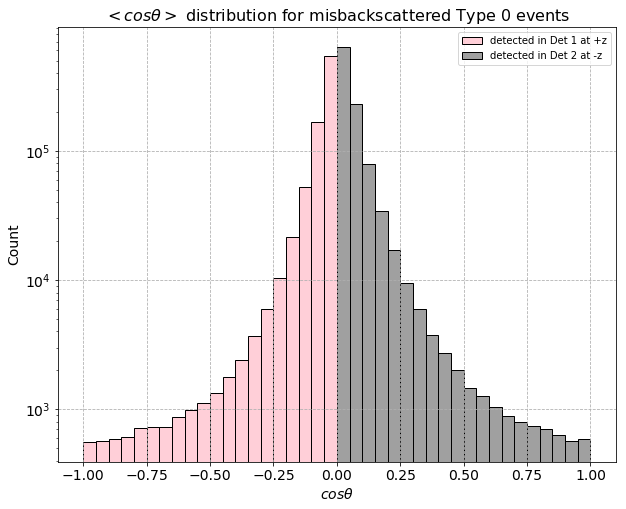

In [79]:
plt.figure(figsize = (10, 8))
sns.histplot(miscatter_type01['pZe'], bins = 20,  color = 'pink', fill = True, log_scale=(False, True), label = 'detected in Det 1 at +z')
sns.histplot(miscatter_type02['pZe'], bins = 20,  color = 'gray', fill = True, log_scale=(False, True), label = 'detected in Det 2 at -z')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.xlabel(r'$cos\theta$', fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 1e7)
plt.title(r'$<cos\theta>$ distribution for misbackscattered Type 0 events', fontsize = 16)
plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_Miscatter_type0.eps')

plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_Miscatter_type0.png')

In [36]:
# filter out the events that deposit energy in foil and  detector at direction opposite to the detetction
miscatter_detectedin2_scatter_foil1 = miscatter_type02[miscatter_type02['eFoil1'] != 0]
miscatter_detectedin1_scatter_foil2 = miscatter_type01[miscatter_type01['eFoil2'] != 0]

In [ ]:
miscatter_detectedin2_scatter_foil1['Deposits Energy in Det 1'] = np.where(miscatter_detectedin2_scatter_foil1['dEeSilicon1'] != 0, 1, 0)
miscatter_detectedin1_scatter_foil2['Deposits Energy in Det 2'] = np.where(miscatter_detectedin1_scatter_foil2['dEeSilicon2'] != 0, 1, 0)

In [60]:
miscatter_detectedin2_scatter_foil1.head()

,KE,pZe,E2,dEeSilicon1,eFoil1,eFoil2,Deposits Energy in Det 1
119,427.250,0.079773,421.250,0.000000,1.177734,0.055878,0
217,224.625,0.069885,218.625,0.000000,1.947266,0.192871,0
446,105.625,0.023956,89.750,6.664062,2.341797,0.165039,1
478,333.250,0.071716,318.500,0.000000,0.112427,0.062927,0
585,621.500,0.027756,606.500,0.000000,1.664062,2.640625,0


In [70]:
hue_colors1 = {0: 'pink', 1: 'red'}
hue_colors2 = {0: 'gray', 1: 'blue'}

hue_labels1 = {0: 'No', 1: 'Yes'}
#hue_labels2 = {0: '', 1: 'deposits energy in Det 2'}


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


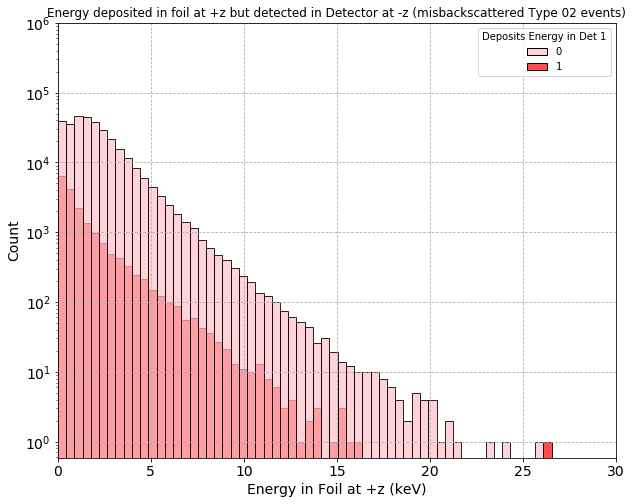

In [81]:
plt.figure(figsize = (10, 8))
sns.histplot(miscatter_detectedin2_scatter_foil1, x ='eFoil1', palette=hue_colors1, hue='Deposits Energy in Det 1', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)
#sns.histplot(miscatter_detectedin1_scatter_foil2, x ='eFoil2', palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = False, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2, x = 'eFoil2', color=hue_colors2, bins = 60, alpha = 0.7,  fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2[miscatter_detectedin1_scatter_foil2['dEeSilicon2'] > 0.0], bins = 60, alpha = 0.5, color = 'blue', fill = True, log_scale=(False, True), label = 'Deposits Det 2')
#sns.histplot(miscatter_detectedin2_scatter_foil1[miscatter_detectedin2_scatter_foil1['dEeSilicon1'] > 0.0], bins = 60, alpha = 0.5, color = 'yellow', fill = True, log_scale=(False, True), label = 'Deposits Det 1')


plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel('Energy in Foil at +z (keV)', fontsize = 14)
plt.xlim(0, 30)
plt.ylim(0,1e6)
plt.title('Energy deposited in foil at +z but detected in Detector at -z (misbackscattered Type 02 events)', fontsize = 12)

plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil1_Miscatter_type02.eps')
plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil1_Miscatter_type02.png')

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


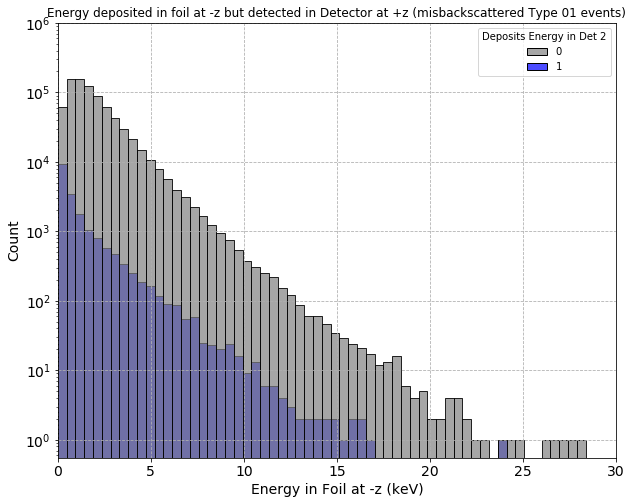

In [82]:
plt.figure(figsize = (10, 8))
#sns.histplot(miscatter_detectedin2_scatter_foil1, x ='eFoil1', palette=hue_colors1, hue='Deposits Energy in Det 1', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)
sns.histplot(miscatter_detectedin1_scatter_foil2, x ='eFoil2', palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2, x = 'eFoil2', color=hue_colors2, bins = 60, alpha = 0.7,  fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2[miscatter_detectedin1_scatter_foil2['dEeSilicon2'] > 0.0], bins = 60, alpha = 0.5, color = 'blue', fill = True, log_scale=(False, True), label = 'Deposits Det 2')
#sns.histplot(miscatter_detectedin2_scatter_foil1[miscatter_detectedin2_scatter_foil1['dEeSilicon1'] > 0.0], bins = 60, alpha = 0.5, color = 'yellow', fill = True, log_scale=(False, True), label = 'Deposits Det 1')


plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel('Energy in Foil at -z (keV)', fontsize = 14)
plt.xlim(0, 30)
plt.ylim(0, 1e6)
plt.title('Energy deposited in foil at -z but detected in Detector at +z (misbackscattered Type 01 events)', fontsize = 12)

plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil2_Miscatter_type01.eps')
plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil2_Miscatter_type01.png')

In [ ]:
 #let's see if they deposit energy in foil 